In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('project-16_phase2-Automobile_insurance_fraud.csv')

In [3]:
df.shape

(1000, 40)

In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df._c39

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
995   NaN
996   NaN
997   NaN
998   NaN
999   NaN
Name: _c39, Length: 1000, dtype: float64

In [6]:
df["fraud_reported"].unique()

array(['Y', 'N'], dtype=object)

# EDA
Null/NaN

In [7]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [59]:
columns_to_drop=["_c39",] # It can be dropped as 100% is nan
df = df.drop(columns_to_drop, axis=1)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


<Axes: >

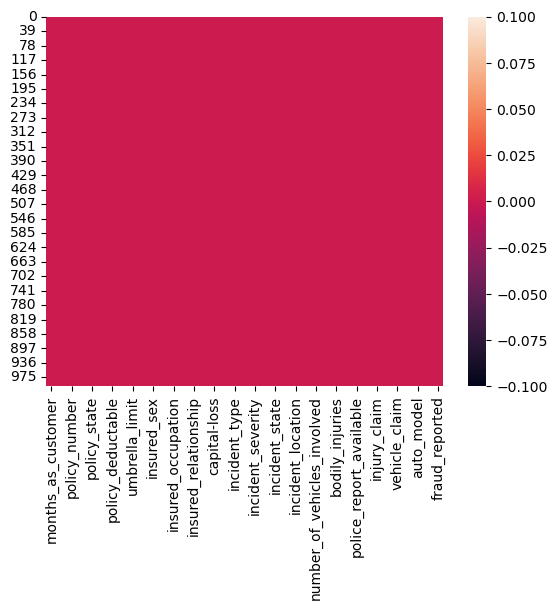

In [60]:
sns.heatmap(df.isnull())

In [61]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [62]:
df.nunique().to_frame("No of unique values")

,No of unique values
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


# Note3:
policy_number,incident_location can be dropped as it has unique values.

In [63]:
columns_to_drop=["policy_number","incident_location"]
df = df.drop(columns_to_drop, axis=1)

In [64]:
df.shape

(1000, 37)

In [65]:
categorical_col =[]
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")
num_col =[]
for i in df.dtypes.index:
    if df.dtypes[i] != "object":
        num_col.append(i)
print("Numerical Columns: ", num_col)
print("\n")

Categorical Columns:  ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


Numerical Columns:  ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']




# 2. Label Encoder

In [66]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
        
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,532.0,2.0,1.0,1000,1406.91,0,466132,1.0,...,2,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
1,228,42,821.0,1.0,1.0,2000,1197.22,5000000,468176,1.0,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,1.0
2,134,29,186.0,2.0,0.0,2000,1413.14,5000000,430632,0.0,...,3,1.0,34650,7700,3850,23100,4.0,30.0,2007,0.0
3,256,41,766.0,0.0,1.0,2000,1415.74,6000000,608117,0.0,...,2,1.0,63400,6340,6340,50720,3.0,34.0,2014,1.0
4,228,44,181.0,0.0,2.0,1000,1583.91,6000000,610706,1.0,...,1,1.0,6500,1300,650,4550,0.0,31.0,2009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,487.0,2.0,2.0,1000,1310.80,0,431289,0.0,...,1,0.0,87200,17440,8720,61040,6.0,6.0,2006,0.0
996,285,41,129.0,0.0,0.0,1000,1436.79,0,608177,0.0,...,3,0.0,108480,18080,18080,72320,13.0,28.0,2015,0.0
997,130,34,509.0,2.0,1.0,500,1383.49,3000000,442797,0.0,...,3,2.0,67500,7500,7500,52500,11.0,19.0,1996,0.0
998,458,62,573.0,0.0,2.0,2000,1356.92,5000000,441714,1.0,...,1,2.0,46980,5220,5220,36540,1.0,5.0,1998,0.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   float64
 3   policy_state                 1000 non-null   float64
 4   policy_csl                   1000 non-null   float64
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   float64
 10  insured_education_level      1000 non-null   float64
 11  insured_occupation           1000 non-null   float64
 12  insured_hobbies              1000 non-null   float64
 13  insured_relationshi

# 3. Skewness, Outliars (We donot remove Skewness and Outliars from categorial columns

In [68]:
df.describe()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,...,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,...,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,...,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


# -Note 2: Observations:
-Column count is same: No missing data
-There is no negative/valid _ Dataset is OK
-Median (50%) > Mean - "total_claim_amount',"vehicle_claim","" --> Left Skewed
-Median (50%) < Mean - "policy_deductable","insured_zip","injury_claim",""-> Right Skewed
-Standard Dev for "months_as_customer",             --    --"policy_bind_date","policy_deductable","policy_annual_premium","insured_zip","total_claim_amount","injury_claim","property_claim   ","vehicle_claim" is high -> Outliars are present
-Percentile 75% and max : It is there in   --"months_as_customer","age","policy_bind_date","policy_annual_premium","total_claim_amount","injury_claim","property_claim","vehi   cle_claim" -> outliars are present

In [69]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664


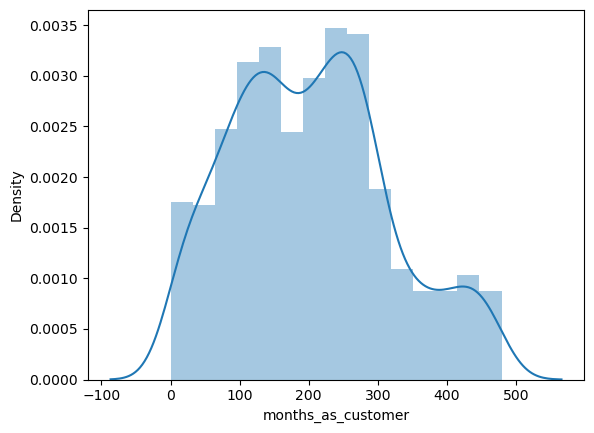

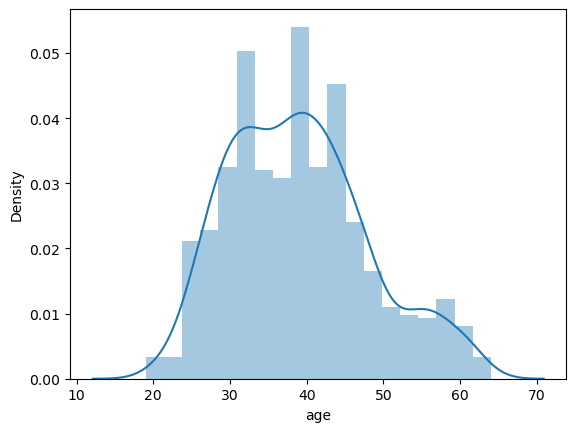

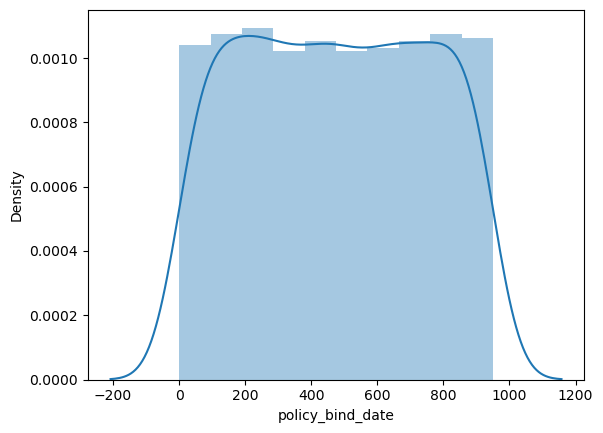

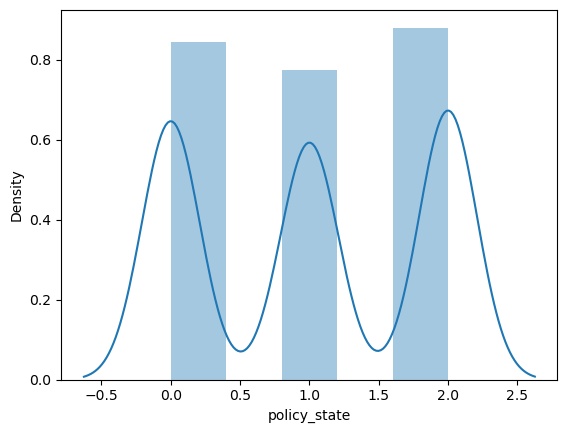

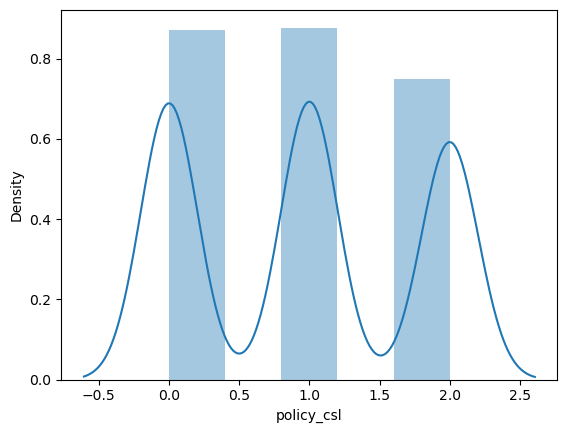

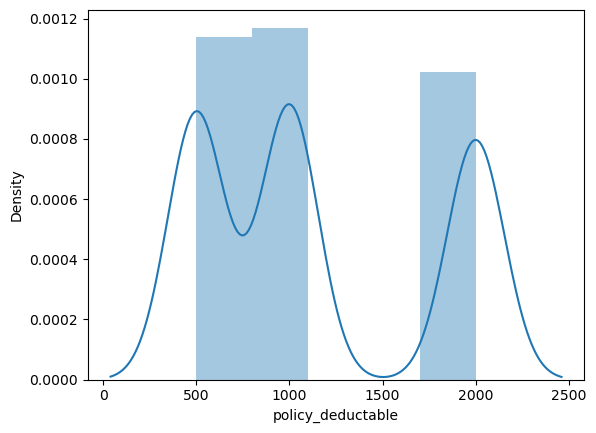

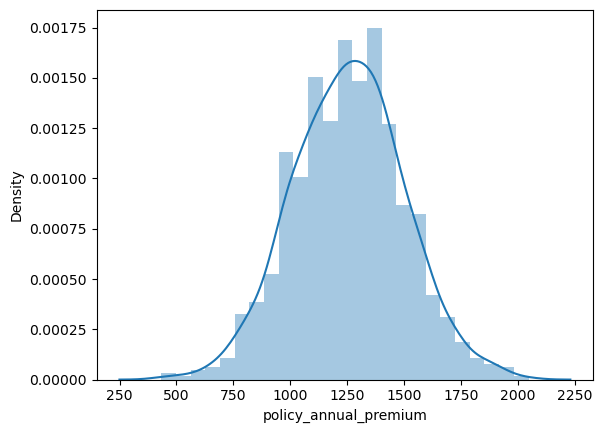

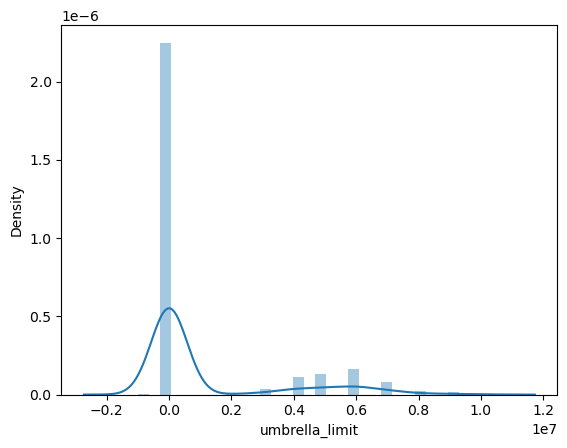

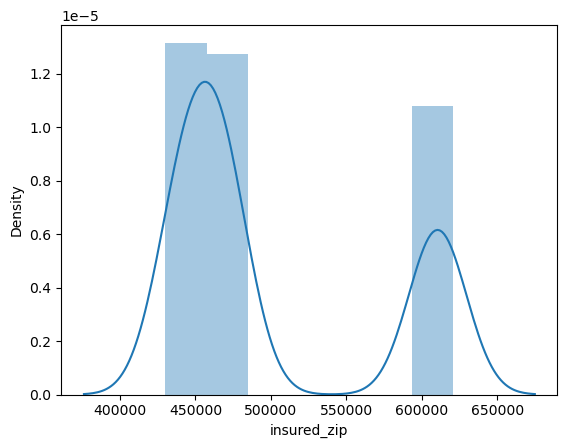

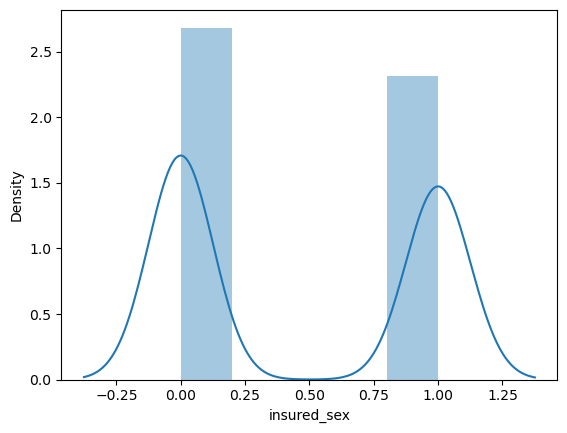

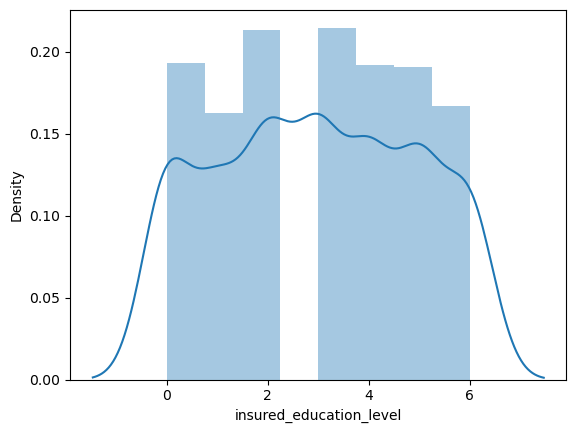

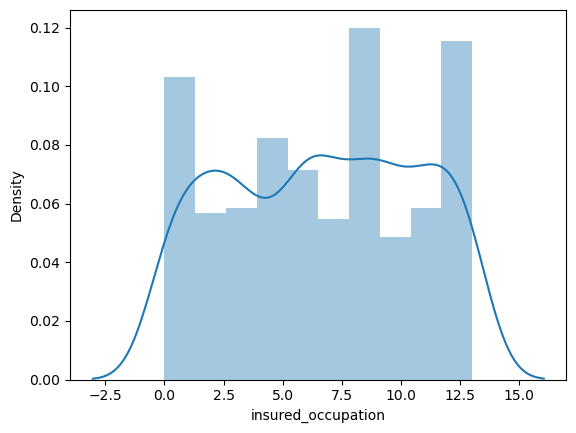

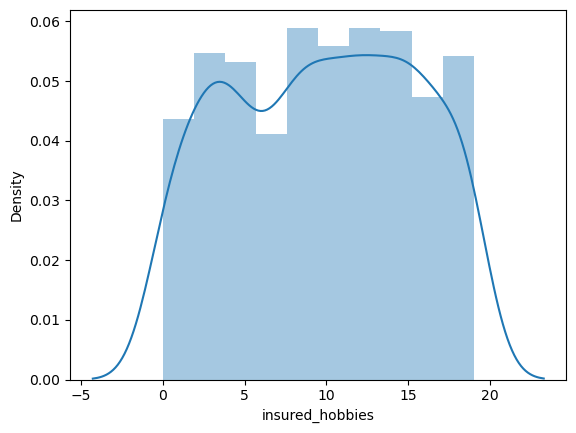

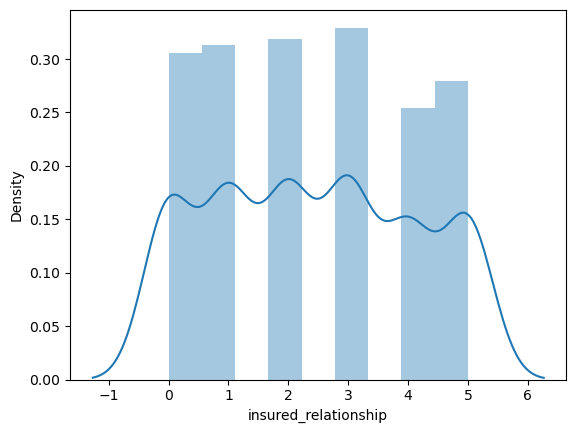

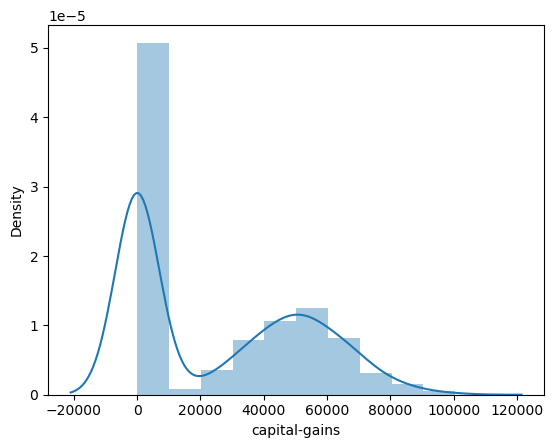

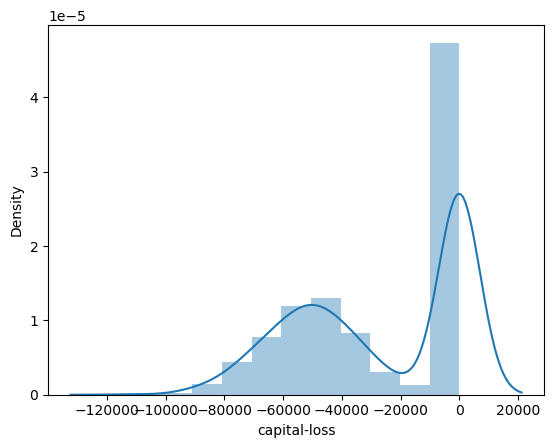

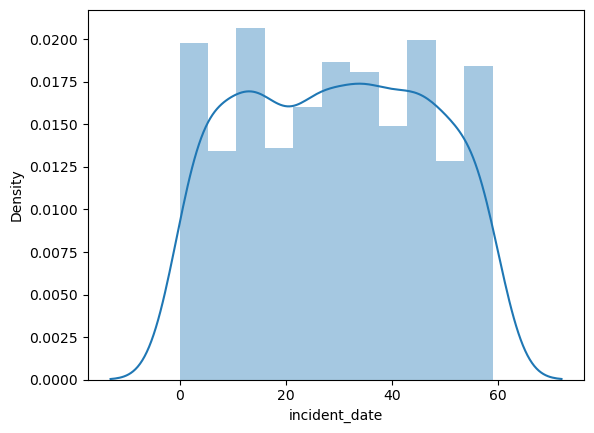

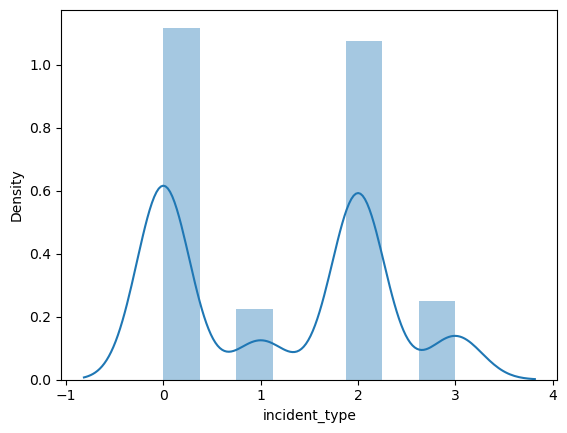

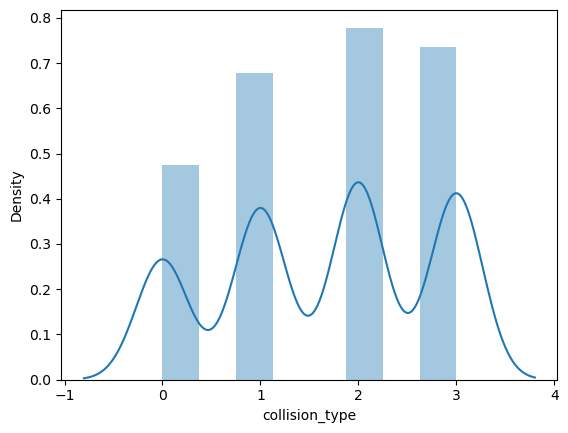

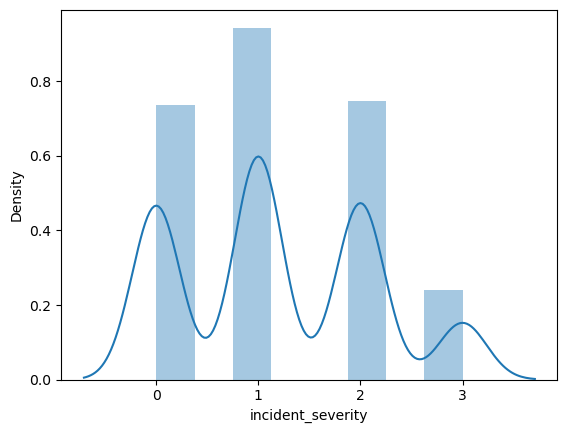

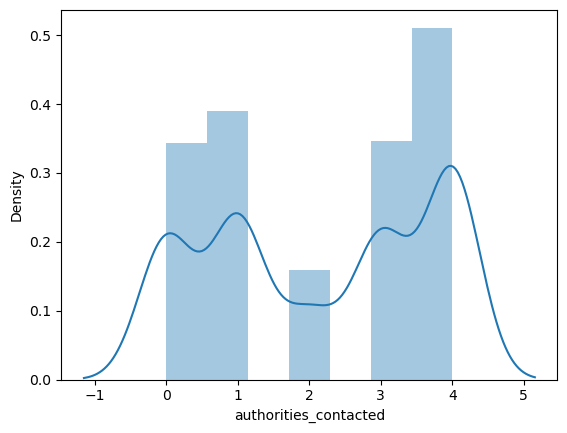

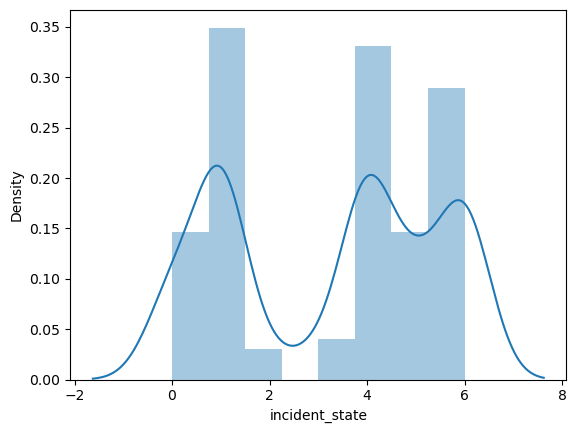

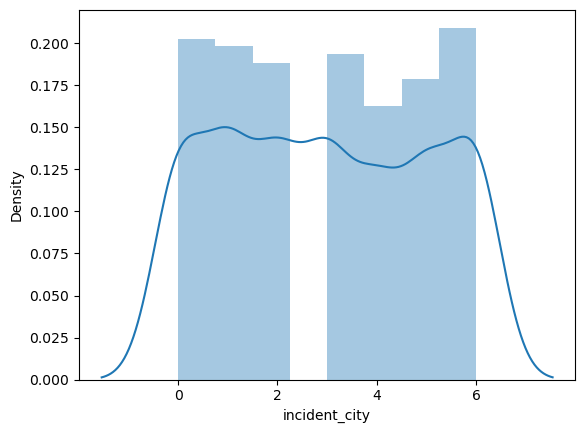

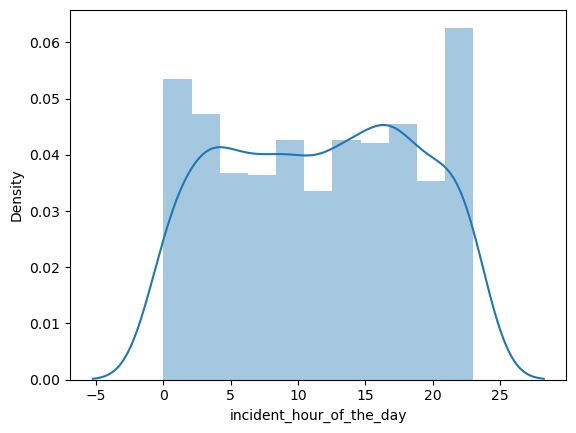

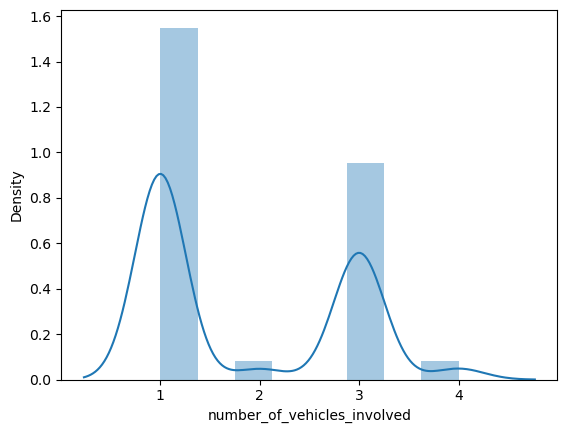

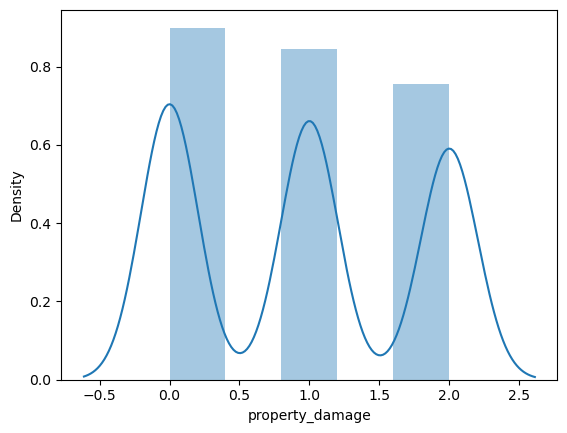

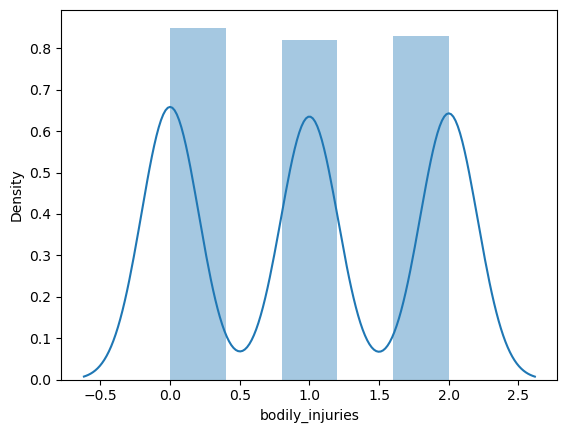

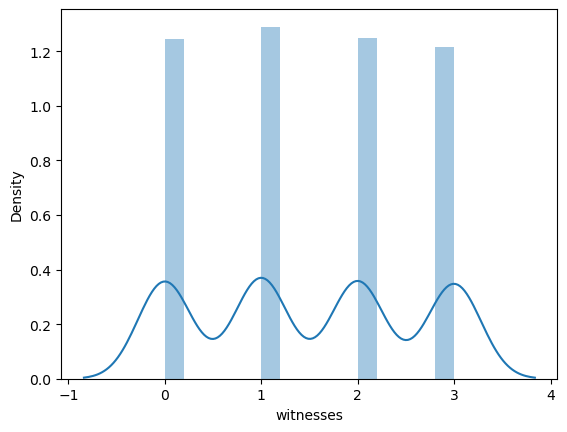

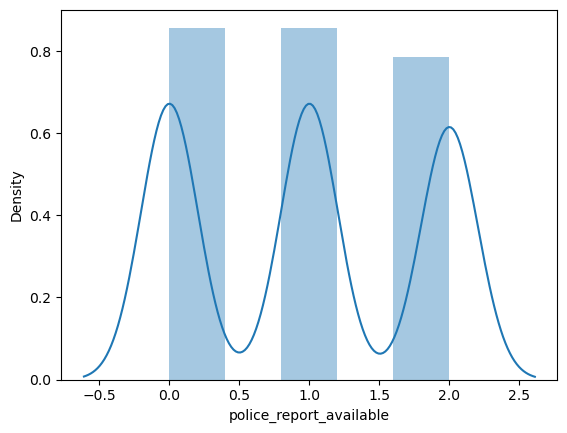

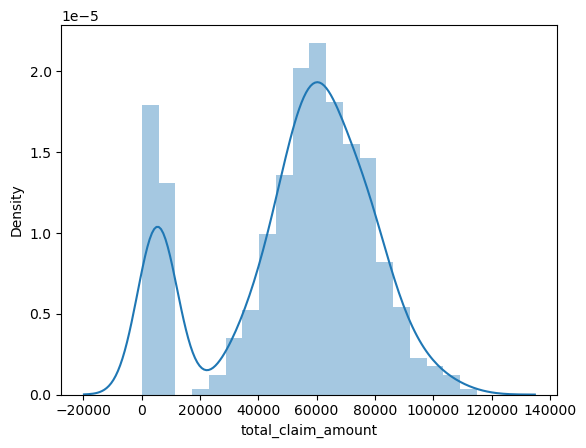

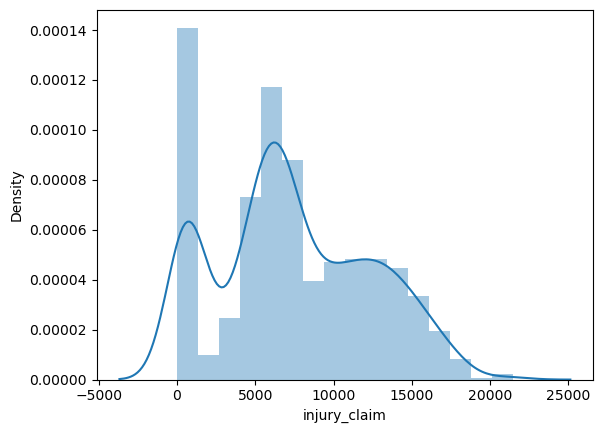

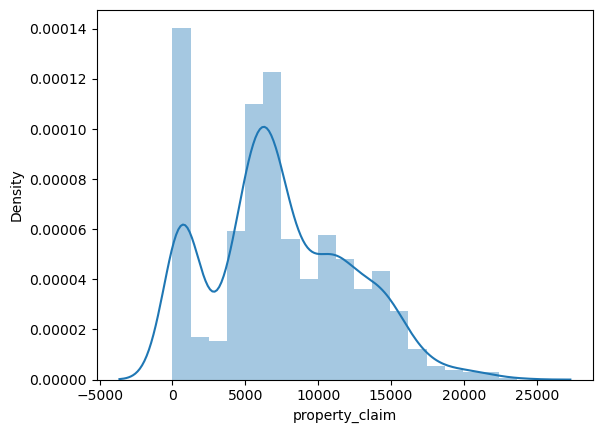

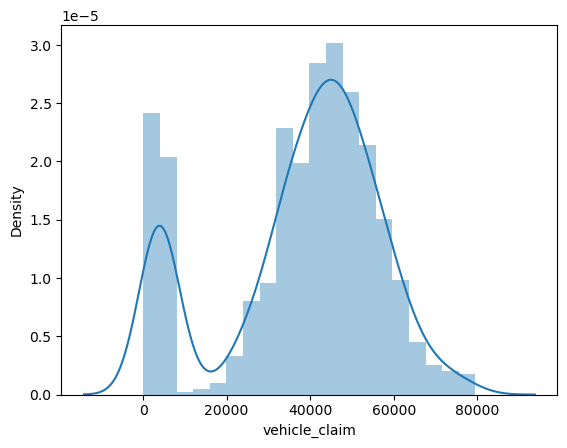

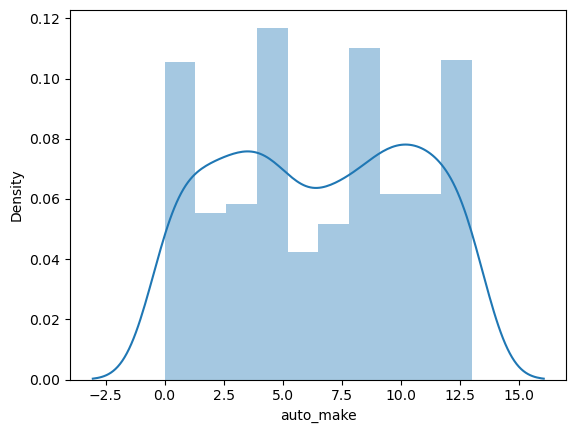

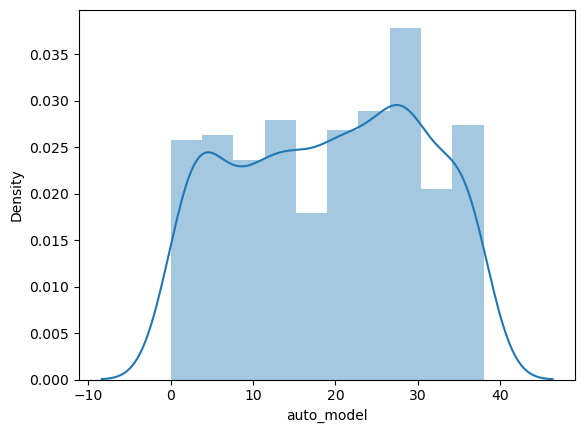

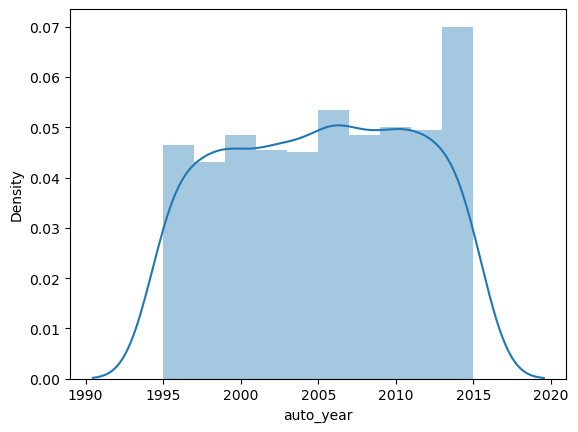

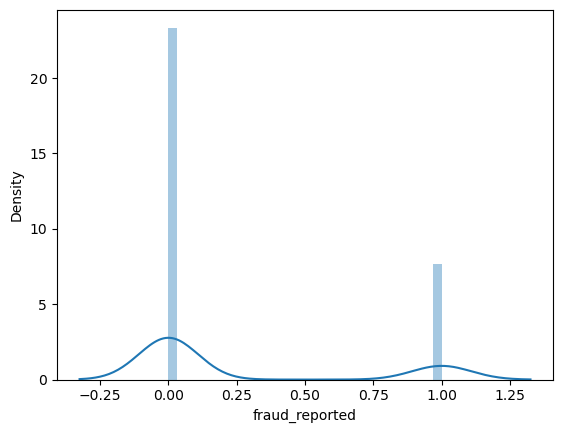

In [70]:
for i in df.columns: # Skewness
    plt.figure()
    sns.distplot(df[i])

months_as_customer                Axes(0.125,0.825775;0.168478x0.0542254)
age                            Axes(0.327174,0.825775;0.168478x0.0542254)
policy_bind_date               Axes(0.529348,0.825775;0.168478x0.0542254)
policy_state                   Axes(0.731522,0.825775;0.168478x0.0542254)
policy_csl                        Axes(0.125,0.760704;0.168478x0.0542254)
policy_deductable              Axes(0.327174,0.760704;0.168478x0.0542254)
policy_annual_premium          Axes(0.529348,0.760704;0.168478x0.0542254)
umbrella_limit                 Axes(0.731522,0.760704;0.168478x0.0542254)
insured_zip                       Axes(0.125,0.695634;0.168478x0.0542254)
insured_sex                    Axes(0.327174,0.695634;0.168478x0.0542254)
insured_education_level        Axes(0.529348,0.695634;0.168478x0.0542254)
insured_occupation             Axes(0.731522,0.695634;0.168478x0.0542254)
insured_hobbies                   Axes(0.125,0.630563;0.168478x0.0542254)
insured_relationship           Axes(0.

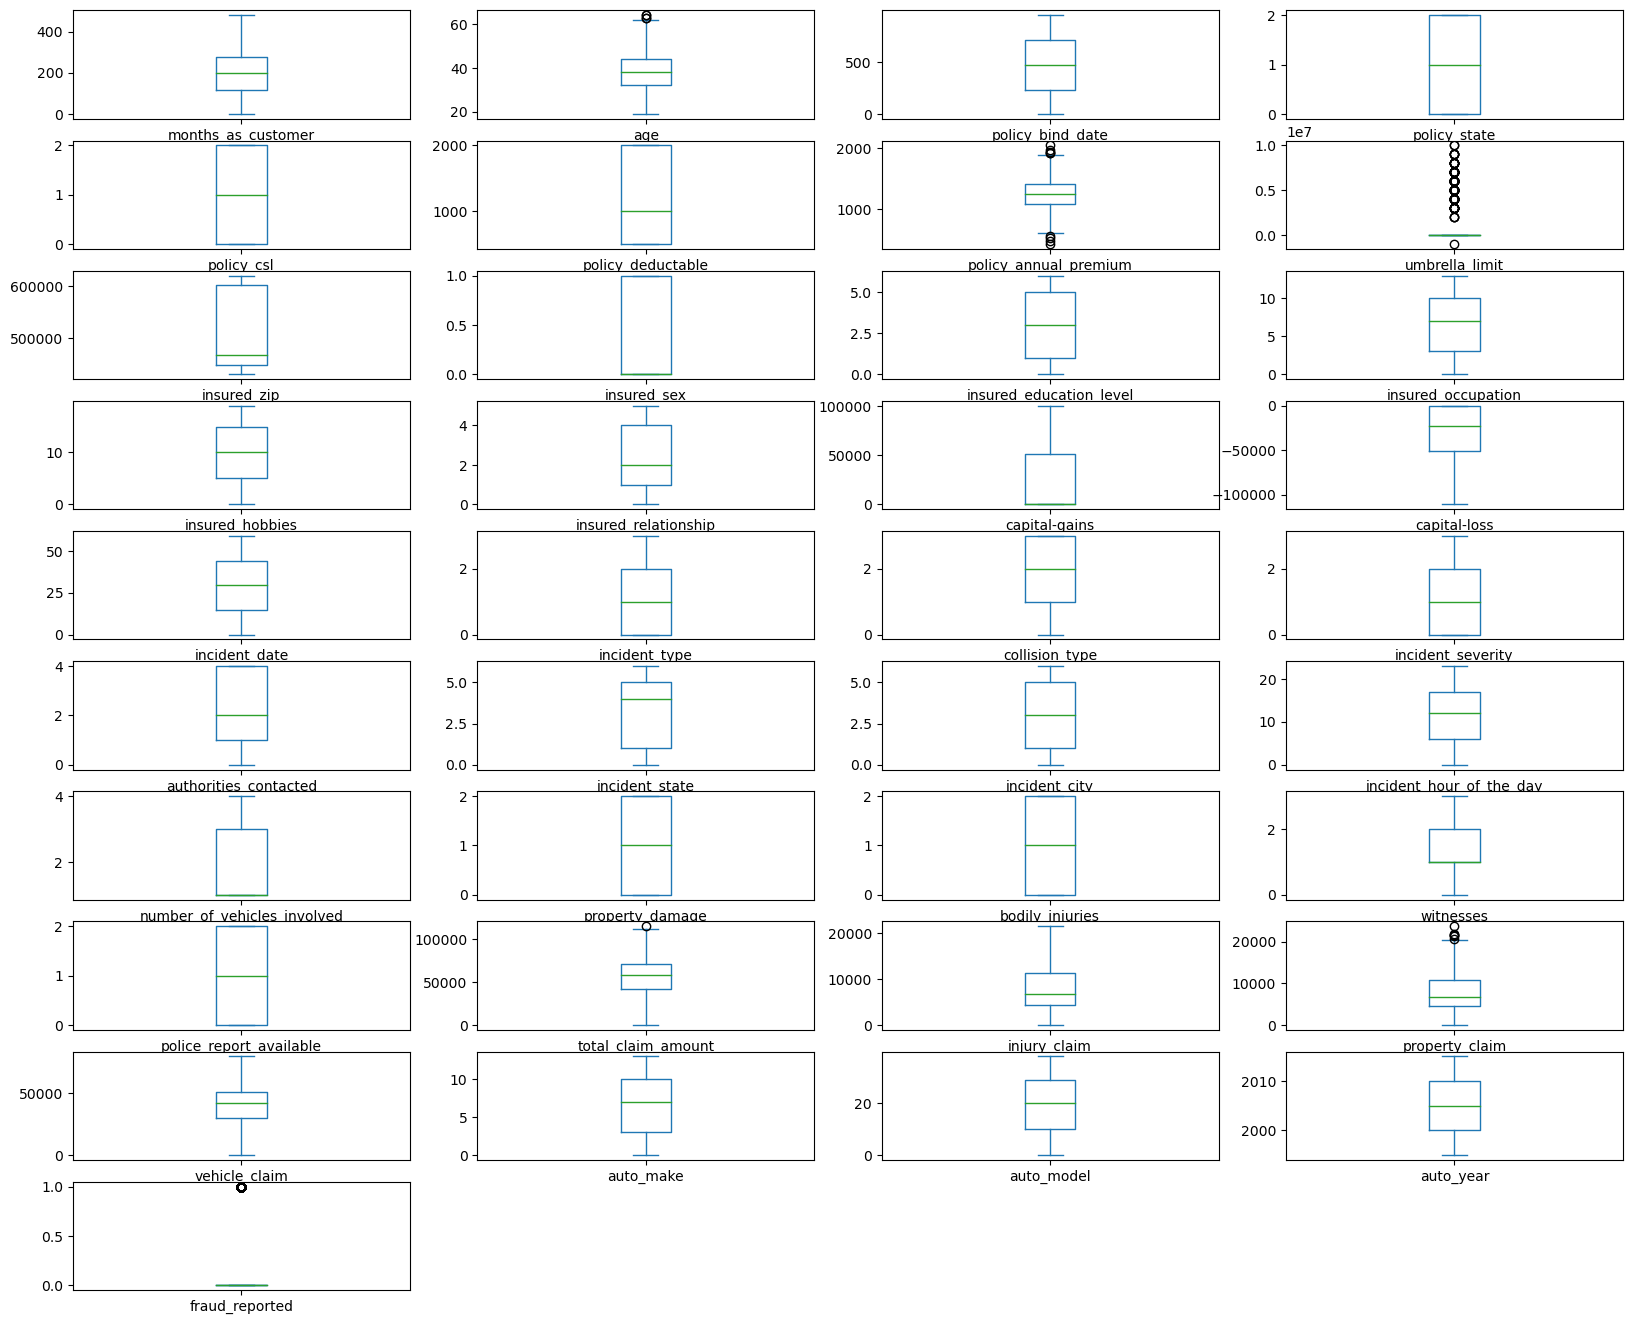

In [23]:
df.plot(kind='box',subplots=True,layout=(12,4),figsize=(20,20))

Note 3: Observations: . Age,policy_annual_premium,umbrella_limit,property_claim,fraud_reported has major outliares.



# Remove Outliers

In [25]:
from scipy.stats import zscore
ol = ['age','policy_annual_premium','umbrella_limit','property_claim','fraud_reported']
x_x=0
for i in ol:
    y_y=0
    col = df[i]
    z=zscore(col)
    thresh =3
    df1 = df[(z < thresh) & (z > -thresh)]
    y_y = df.shape[0]-df1.shape[0]
    x_x= x_x + y_y

print("Data loss rate",(x_x/df.shape[0])*100)

Data loss rate 1.9


# 4. Co- Relation and Multicolinearity

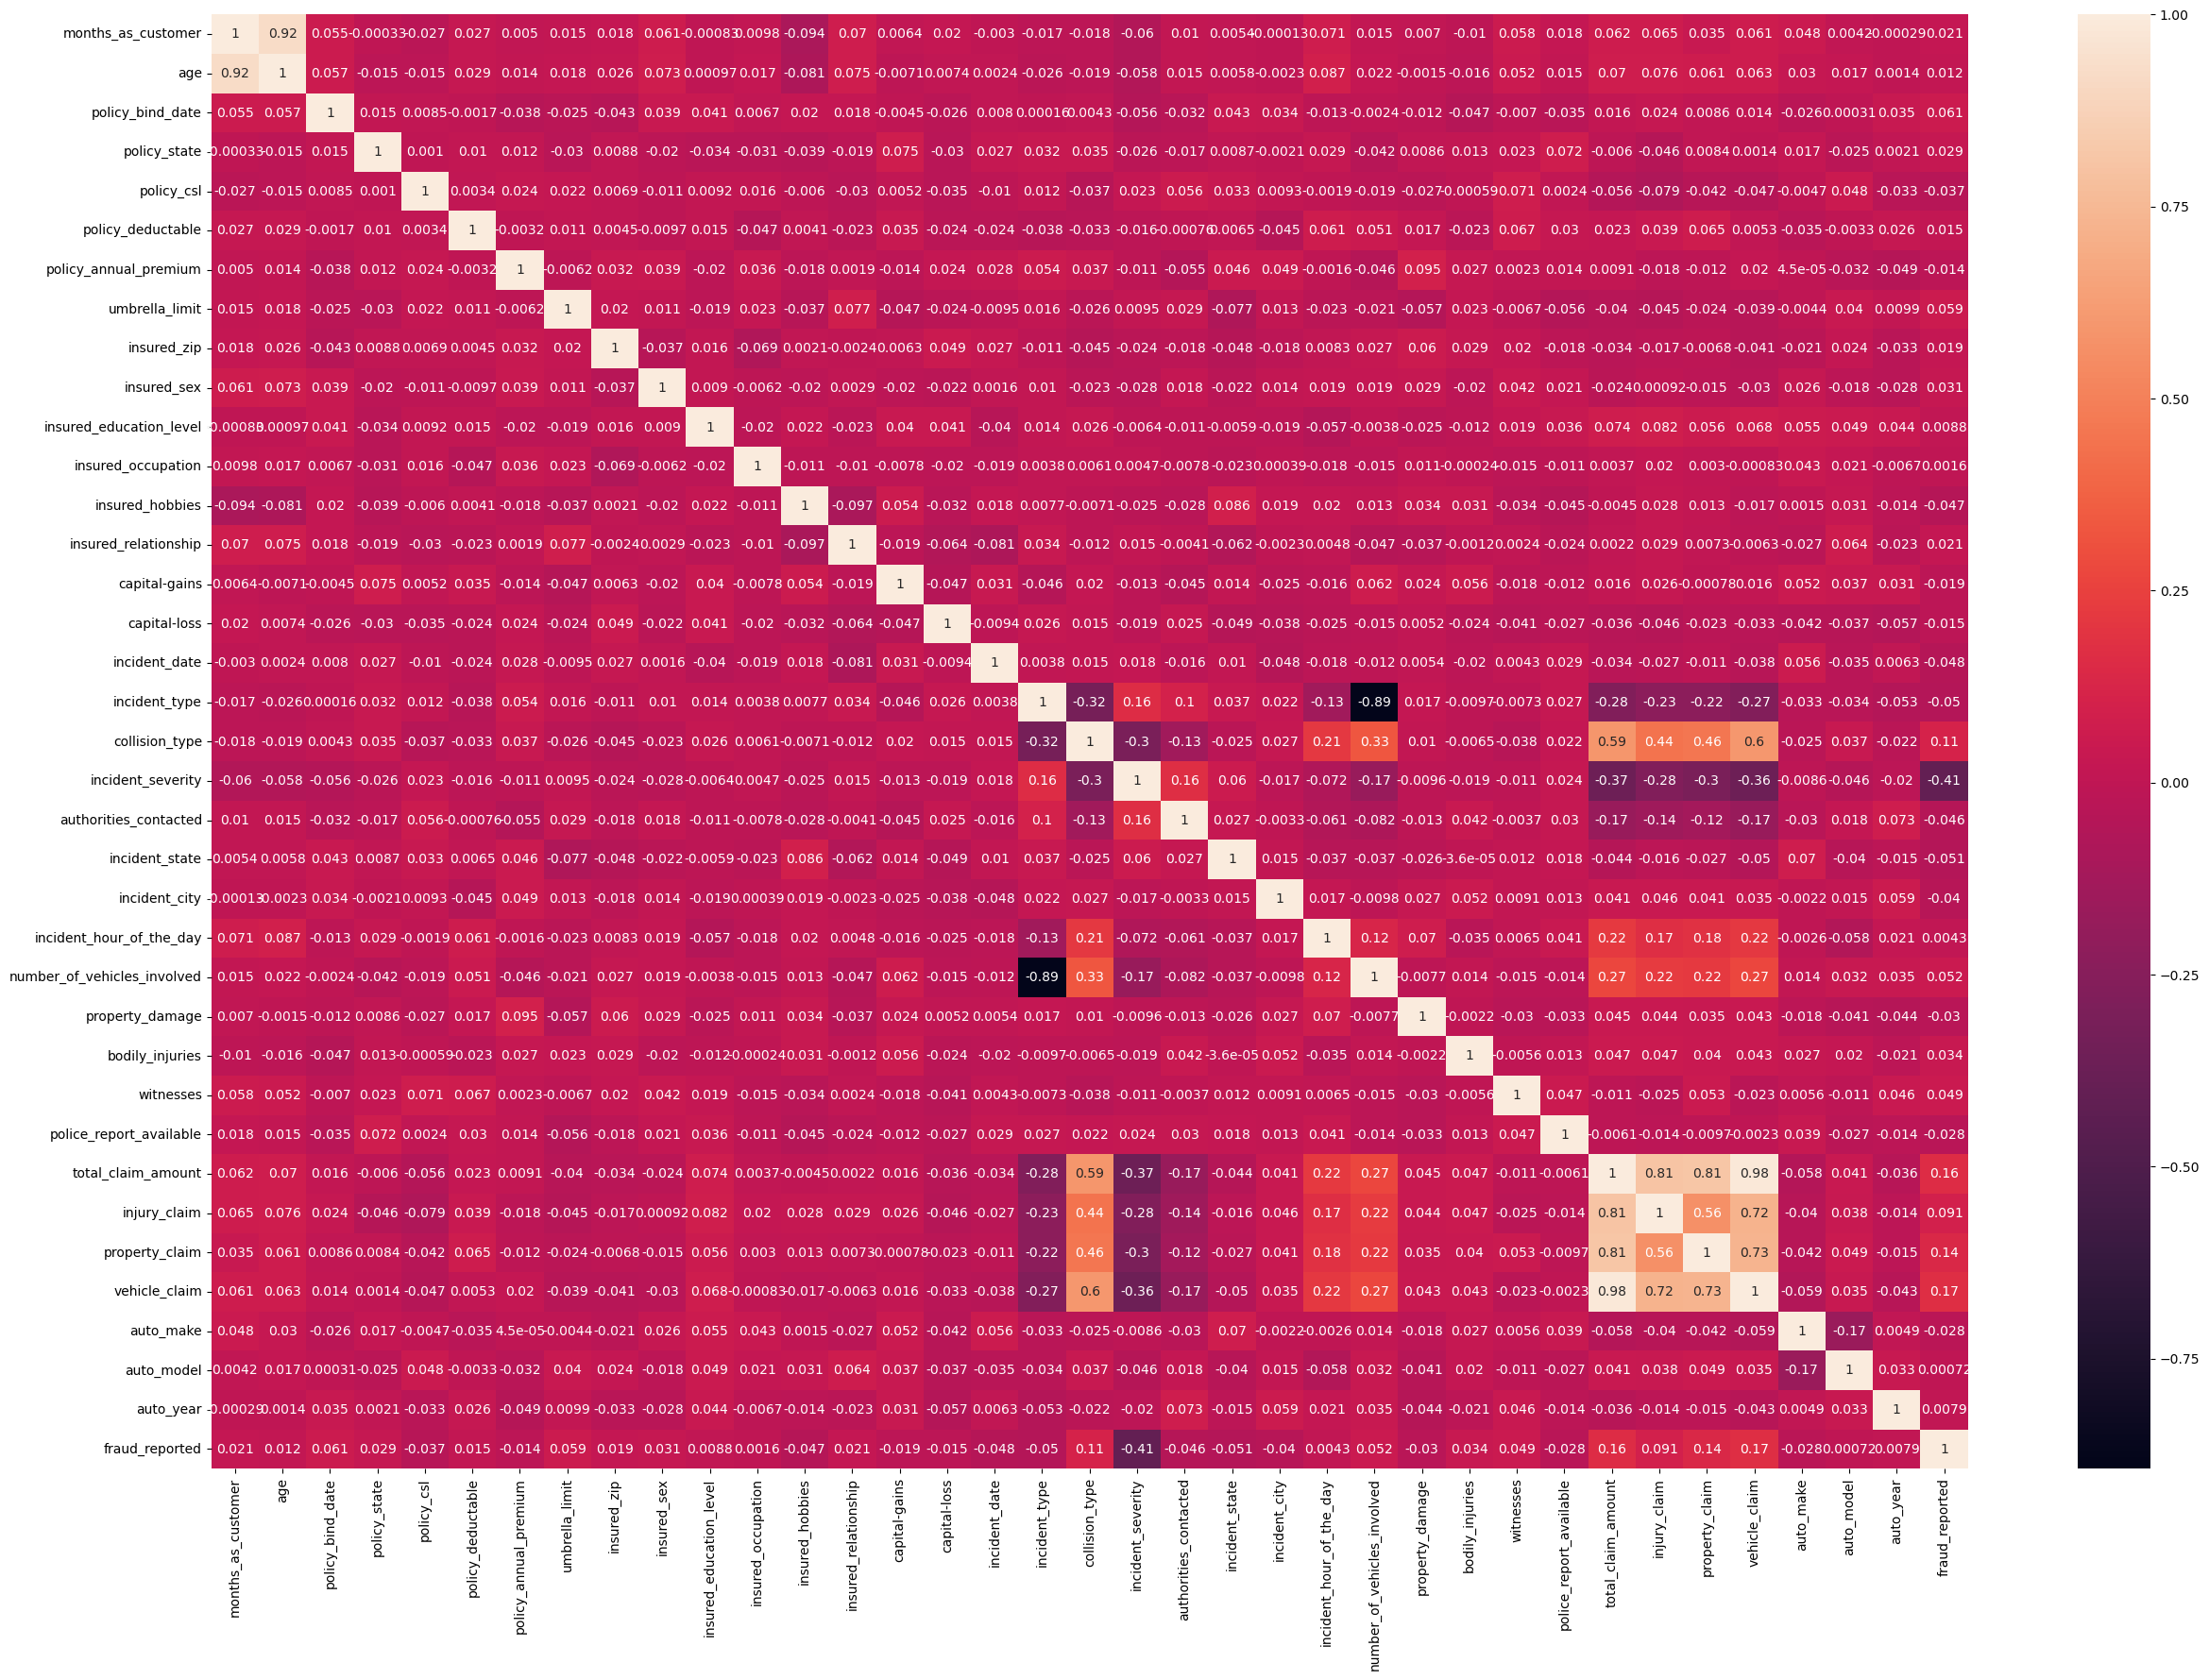

In [40]:
corr_hmap=df1.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [71]:
cor=df1.corr()
cor

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.055055,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,...,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.056538,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,...,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_bind_date,0.055055,0.056538,1.000000,0.015289,0.008486,-0.001721,-0.037733,-0.024866,-0.042749,0.039338,...,-0.007004,-0.034920,0.015901,0.024160,0.008611,0.013784,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000328,-0.014533,0.015289,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,...,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.008486,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,...,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.001721,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,...,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,-0.037733,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,...,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,-0.024866,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,...,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,-0.042749,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,...,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368
insured_sex,0.060925,0.073337,0.039338,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,...,0.042463,0.020864,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873


- Near to Zero : No Corelation- Low Corelation Worst - 
- 0.3 or >-0.3 --> 
- 0.5 or >-0.5 --> 
- 0.7 or >-0.7 --> 

In [72]:
df.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.iloc[:,0:-1]
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
vif_cal()

    VIF Factor                     features
0    28.316768           months_as_customer
1   131.387078                          age
2     4.071451             policy_bind_date
3     2.570394                 policy_state
4     2.457296                   policy_csl
5     4.615725            policy_deductable
6    28.574780        policy_annual_premium
7     1.266746               umbrella_limit
8    51.470295                  insured_zip
9     1.912471                  insured_sex
10    3.445142      insured_education_level
11    3.814315           insured_occupation
12    4.136614              insured_hobbies
13    3.220887         insured_relationship
14    1.877137                capital-gains
15    1.981664                 capital-loss
16    4.007139                incident_date
17   11.063561                incident_type
18    5.935471               collision_type
19    3.132511            incident_severity
20    3.207626        authorities_contacted
21    3.407453               inc

In [74]:
columns_to_drop=['age','policy_annual_premium','insured_zip','number_of_vehicles_involved','auto_year'] # Least co-relation with output and high multicollinearity
df = df.drop(columns_to_drop, axis=1)
df

,months_as_customer,policy_bind_date,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,532.0,2.0,1.0,1000,0,1.0,4.0,2.0,17.0,...,1,2,2.0,71610,6510,13020,52080,10.0,1.0,1.0
1,228,821.0,1.0,1.0,2000,5000000,1.0,4.0,6.0,15.0,...,0,0,0.0,5070,780,780,3510,8.0,12.0,1.0
2,134,186.0,2.0,0.0,2000,5000000,0.0,6.0,11.0,2.0,...,2,3,1.0,34650,7700,3850,23100,4.0,30.0,0.0
3,256,766.0,0.0,1.0,2000,6000000,0.0,6.0,1.0,2.0,...,1,2,1.0,63400,6340,6340,50720,3.0,34.0,1.0
4,228,181.0,0.0,2.0,1000,6000000,1.0,0.0,11.0,2.0,...,0,1,1.0,6500,1300,650,4550,0.0,31.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,487.0,2.0,2.0,1000,0,0.0,5.0,2.0,13.0,...,0,1,0.0,87200,17440,8720,61040,6.0,6.0,0.0
996,285,129.0,0.0,0.0,1000,0,0.0,6.0,9.0,17.0,...,2,3,0.0,108480,18080,18080,72320,13.0,28.0,0.0
997,130,509.0,2.0,1.0,500,3000000,0.0,5.0,1.0,3.0,...,2,3,2.0,67500,7500,7500,52500,11.0,19.0,0.0
998,458,573.0,0.0,2.0,2000,5000000,1.0,0.0,5.0,0.0,...,0,1,2.0,46980,5220,5220,36540,1.0,5.0,0.0


In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.iloc[:,0:-1]
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
vif_cal()

    VIF Factor                  features
0     4.206642        months_as_customer
1     3.874294          policy_bind_date
2     2.510414              policy_state
3     2.412801                policy_csl
4     4.293885         policy_deductable
5     1.258731            umbrella_limit
6     1.868691               insured_sex
7     3.354533   insured_education_level
8     3.590507        insured_occupation
9     3.885474           insured_hobbies
10    3.057210      insured_relationship
11    1.862447             capital-gains
12    1.973488              capital-loss
13    3.745009             incident_date
14    2.402906             incident_type
15    5.759228            collision_type
16    2.878620         incident_severity
17    3.062647     authorities_contacted
18    3.302331            incident_state
19    3.078492             incident_city
20    4.090795  incident_hour_of_the_day
21    2.348775           property_damage
22    2.470864           bodily_injuries
23    2.819745  

# MODEL

Feature Scaling using Standard Scalarization

In [77]:
y=df["fraud_reported"]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,months_as_customer,policy_bind_date,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model
0,1.078140,0.209500,1.187173,0.060937,-0.222383,-0.479476,1.076953,0.530931,-1.158316,1.281737,...,1.303656,0.009759,0.461838,1.270313,0.714257,-0.189283,1.165505,0.749653,0.856466,-1.645743
1,0.208995,1.259397,-0.016856,0.060937,1.412784,1.697980,1.076953,0.530931,-0.162558,0.929078,...,-1.160722,-1.210174,-1.338700,-1.198712,-1.807312,-1.363822,-1.372696,-1.823346,0.360539,-0.657470
2,-0.608002,-1.047470,1.187173,-1.182668,1.412784,1.697980,-0.928546,1.557877,1.082141,-1.363201,...,0.071467,1.229693,1.362107,0.035801,-0.686362,0.054644,-0.736072,-0.785565,-0.631315,0.959702
3,0.452355,1.059589,-1.220886,0.060937,1.412784,2.133471,-0.928546,1.557877,-1.407256,-1.363201,...,-1.160722,0.009759,0.461838,0.035801,0.403135,-0.224130,-0.219722,0.677607,-0.879279,1.319074
4,0.208995,-1.065634,-1.220886,1.304542,-0.222383,2.133471,1.076953,-1.522961,1.082141,-1.363201,...,0.071467,-1.210174,-0.438431,0.035801,-1.753121,-1.257232,-1.399654,-1.768252,-1.623169,1.049545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,0.046021,1.187173,1.304542,-0.222383,-0.479476,-0.928546,1.044404,-1.158316,0.576420,...,1.303656,-1.210174,-0.438431,-1.198712,1.305049,2.051155,0.273817,1.224309,-0.135388,-1.196528
996,0.704407,-1.254543,-1.220886,-1.182668,-0.222383,-0.479476,-0.928546,1.557877,0.584261,1.281737,...,1.303656,1.229693,1.362107,-1.198712,2.111466,2.182342,2.214794,1.821868,1.600357,0.780016
997,-0.642767,0.125944,1.187173,0.060937,-1.039966,0.826998,-0.928546,1.044404,-1.407256,-1.186872,...,-1.160722,1.229693,1.362107,1.270313,0.558507,0.013648,0.020826,0.771902,1.104430,-0.028570
998,2.208028,0.358447,-1.220886,1.304542,1.412784,1.697980,1.076953,-1.522961,-0.411497,-1.715859,...,-1.160722,-1.210174,-0.438431,1.270313,-0.219110,-0.453708,-0.451976,-0.073580,-1.375206,-1.286371


# 2. OverSampling

In [78]:
y.value_counts()

0.0    753
1.0    247
Name: fraud_reported, dtype: int64

In [79]:
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1=SM.fit_resample(x,y)

In [80]:
y1.value_counts()

1.0    753
0.0    753
Name: fraud_reported, dtype: int64

# 3. Best random state value:

In [81]:
y1.unique() # Will apply classification model

array([1., 0.])

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



maxAccu=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS=i
print("Best accuracy is", maxAccu," at random state ", maxRS)

Best accuracy is 0.9247787610619469  at random state  15


# 4. Creating train test split

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)

# 5. Classification Algorithms and Cross Validation Score

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
rfc=RandomForestClassifier()
etc=ExtraTreesClassifier()
lg=LogisticRegression()
svc=SVC(kernel = "linear")
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
dtc = DecisionTreeClassifier(criterion = "gini")



model=[rfc,etc,lg,svc,gbc,abc,bc,gnb,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of:  ",m," is " )
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("\n")
    score = cross_val_score(m,x1,y1)
    print("Cross Validation of:  ",m," is " )
    print(score)
    print(score.mean())
    print("Diff in Acc Score and Cross Val Score is - ",accuracy_score(y_test,predm)-score.mean())
    print("\n")

Accuracy Score of:   RandomForestClassifier()  is 
0.9269911504424779
[[200  17]
 [ 16 219]]
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92       217
         1.0       0.93      0.93      0.93       235

    accuracy                           0.93       452
   macro avg       0.93      0.93      0.93       452
weighted avg       0.93      0.93      0.93       452



Cross Validation of:   RandomForestClassifier()  is 
[0.74503311 0.84717608 0.91694352 0.93355482 0.94684385]
0.8779102770016062
Diff in Acc Score and Cross Val Score is -  0.04908087344087175


Accuracy Score of:   ExtraTreesClassifier()  is 
0.9314159292035398
[[195  22]
 [  9 226]]
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       217
         1.0       0.91      0.96      0.94       235

    accuracy                           0.93       452
   macro avg       0.93      0.93      0.93       452
weighted avg       0

Best Model is : ExtraTreesClassifier

# 6. Hyper Parameter Tuning

In [85]:
from sklearn.model_selection import GridSearchCV
parameters = {"criterion" : ["gini", "entropy", "log_loss"],
             "random_state" :[maxRS],
             "max_depth": [0,10,20],
             "n_jobs": [-2,-1,1],
             "n_estimators":[50,100,200,300],
             "class_weight": ["balanced", "balanced_subsample"],
             "max_features": ["sqrt","log2","None"]}

In [86]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameters,cv=7)

In [87]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=ExtraTreesClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 10, 20],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1], 'random_state': [15]})

In [88]:
GCV.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 15}

In [89]:
etc_bp = ExtraTreesClassifier(criterion="entropy",random_state=15,max_features="log2",max_depth=20, class_weight="balanced",n_estimators=200,n_jobs=-2)
etc_bp.fit(x_train,y_train)
pred=etc_bp.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

94.24778761061947


# 8. Saving the Model

In [90]:
import joblib # save as *.pkl
joblib.dump(etc_bp,"project-16_phase2-Automobile_insurance_fraud.Project.pkl")

['project-16_phase2-Automobile_insurance_fraud.Project.pkl']